In [1]:
import numpy as np

#### Solving System Linear Equations using Matrices

In [2]:
A = np.array([
        [-1, 3],
        [3, 2]
    ], dtype=np.dtype(float))

b = np.array([7, 1], dtype=np.dtype(float))

print("Matrix A:")
print(A)
print("\nArray b:")
print(b)

Matrix A:
[[-1.  3.]
 [ 3.  2.]]

Array b:
[7. 1.]


In [4]:
x = np.linalg.solve(A, b)

print(f"Solution: {x}")

Solution: [-1.  2.]


#### Evaluating Determinant of a Matrix

In [3]:
d = np.linalg.det(A)

print(f"Determinant of matrix A: {d:.2f}")

Determinant of matrix A: -11.00


#### Elimination Method

In [5]:
A_system = np.hstack((A, b.reshape((2, 1))))

print(A_system)

[[-1.  3.  7.]
 [ 3.  2.  1.]]


In [6]:
print(A_system[1])

[3. 2. 1.]


In [7]:
A_system_res = A_system.copy()

In [8]:
A_system_res[1] = 3 * A_system_res[0] + A_system_res[1]

print(A_system_res)

[[-1.  3.  7.]
 [ 0. 11. 22.]]


In [9]:
A_system_res[1] = 1/11 * A_system_res[1]

print(A_system_res)

[[-1.  3.  7.]
 [ 0.  1.  2.]]


#### Graphical Representation

In [12]:
import matplotlib.pyplot as plt

def plot_lines(M):
    x_1 = np.linspace(-10,10,100)
    x_2_line_1 = (M[0,2] - M[0,0] * x_1) / M[0,1]
    x_2_line_2 = (M[1,2] - M[1,0] * x_1) / M[1,1]
    
    _, ax = plt.subplots(figsize=(5, 5))
    ax.plot(x_1, x_2_line_1, '-', linewidth=2, color='#0075ff',
        label=f'$x_2={-M[0,0]/M[0,1]:.2f}x_1 + {M[0,2]/M[0,1]:.2f}$')
    ax.plot(x_1, x_2_line_2, '-', linewidth=2, color='#ff7300',
        label=f'$x_2={-M[1,0]/M[1,1]:.2f}x_1 + {M[1,2]/M[1,1]:.2f}$')

    A = M[:, 0:-1]
    b = M[:, -1::].flatten()
    d = np.linalg.det(A)

    if d != 0:
        solution = np.linalg.solve(A,b) 
        ax.plot(solution[0], solution[1], '-o', mfc='none', 
            markersize=10, markeredgecolor='#ff0000', markeredgewidth=2)
        ax.text(solution[0]-0.25, solution[1]+0.75, f'$(${solution[0]:.0f}$,{solution[1]:.0f})$', fontsize=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-10, 10))
    ax.set_yticks(np.arange(-10, 10))

    plt.xlabel('$x_1$', size=14)
    plt.ylabel('$x_2$', size=14)
    plt.legend(loc='upper right', fontsize=14)
    plt.axis([-10, 10, -10, 10])

    plt.grid()
    plt.gca().set_aspect("equal")

    plt.show()

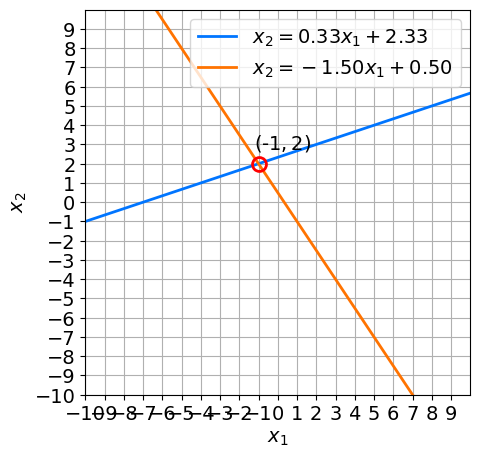

In [13]:
plot_lines(A_system)